# MODELING REACTION NETWORKS

In [1]:
try:
    import controlSBML as ctl
except:
    !pip install controlSBML
    import controlSBML as ctl

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tellurium as te

# Helpers

In [10]:
def simulateAndPlot(roadrunner, start_time=0, end_time=5, num_point=50, variables=None, is_species=True, is_plot=True):
    """
    Runs a simulation and plots the variables.
    
    Parameters
    ----------
    roadrunner: ExtendedRoadrunner
    variables: list-str
    
    Returns
    -------
    Timeseries
    """
    if variables is None:
        if is_species:
            variables = ["time", "S1", "S2", "S3"]
        else:
            variables = ["time", "J0", "J1", "J2"]
    roadrunner.reset()
    ts = ctl.Timeseries(roadrunner.simulate(start_time, end_time, num_point, variables))
    if is_plot:
        ctl.plotOneTS(ts, figsize=(6, 4))
    return ts
    
# Tests
model = "S1->; S2*S3; S1=0; S2=0; S3=0"
rr = te.loada(model)
simulateAndPlot(rr, is_plot=False)
print("OK!")

OK!


# Sequential Pathway With Mass Action Kinetics, No Input Boundary

In [3]:
SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY = """
J0: -> S1; k0
J1: S1->S2; k1*S1
J2: S2 -> S3; k2*S2

k0 = 0
k1 = 1
k2 = 1
S1 = 10
S2 = 0
S3 = 0
"""

RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY = te.loada(SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY)

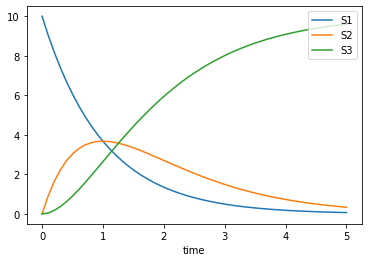

In [11]:
_ = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY)

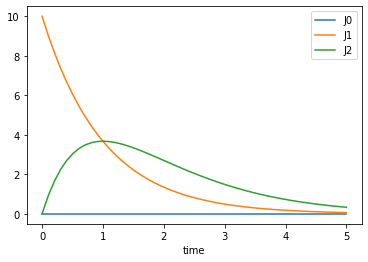

In [5]:
_ = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY, variables=["time", "J0", "J1", "J2"])

# Sequential Pathway With Mass Action Kinetics, With Input Boundary

In [6]:
SEQUENIAL_PATHWAY_MASS_ACTION_WITH_INPUT_BOUNDARY = """
J0: -> S1; k0
J1: S1->S2; k1*S1
J2: S2 -> S3; k2*S2

k0 = 1 # Created an input rate
k1 = 1
k2 = 1
S1 = 10
S2 = 0
S3 = 0
"""

RR_SEQUENIAL_PATHWAY_MASS_ACTION_WITH_INPUT_BOUNDARY = te.loada(SEQUENIAL_PATHWAY_MASS_ACTION_WITH_INPUT_BOUNDARY)

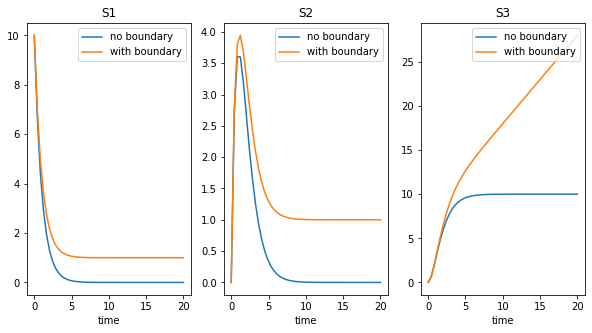

In [18]:
ts1 = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY, end_time=20, is_plot=False)
ts2 = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_WITH_INPUT_BOUNDARY, end_time=20, is_plot=False)
ctl.plotManyTS(ts1, ts2, ncol=3, figsize=(10, 5), names=["no boundary", "with boundary"])

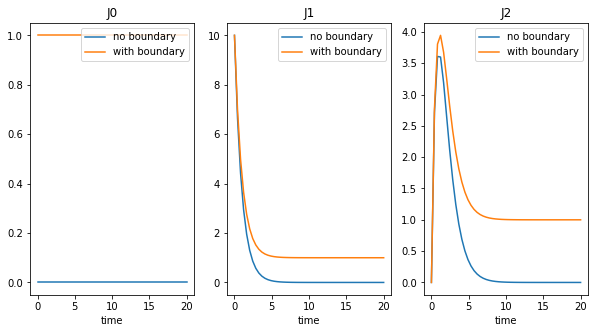

In [19]:
ts1 = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_NO_INPUT_BOUNDARY, is_species=False, end_time=20, is_plot=False)
ts2 = simulateAndPlot(RR_SEQUENIAL_PATHWAY_MASS_ACTION_WITH_INPUT_BOUNDARY, is_species=False, end_time=20, is_plot=False)
ctl.plotManyTS(ts1, ts2, ncol=3, figsize=(10, 5),  names=["no boundary", "with boundary"])

# mTOR